In [1]:
import sys
print(sys.executable)

c:\Users\mtshw\anaconda3\python.exe


In [2]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
wholesale_customers = fetch_ucirepo(id=292)

# Extract features and targets (features = actual data, targets = labels if any)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# Show the first 5 rows of data
X.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [5]:
X.isnull().sum()

Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [7]:
X.columns

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [8]:
from sklearn .preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X = X.drop('Channel', axis=1)

In [10]:
X.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit on X and transform it
X_scaled = scaler.fit_transform(X)

In [12]:
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [13]:
from sklearn.decomposition import PCA

# Create PCA model with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame (optional, for easy viewing)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df.head()

,PC1,PC2
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434


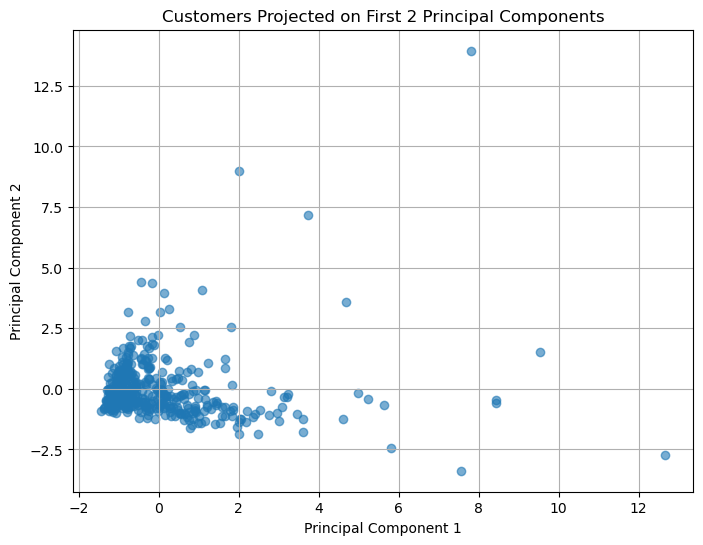

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customers Projected on First 2 Principal Components')
plt.grid(True)
plt.show()

In [15]:
from sklearn.cluster import KMeans

# Choose number of clusters (we'll start with 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the PCA data
kmeans.fit(X_pca)

# Get cluster labels for each customer
labels = kmeans.labels_

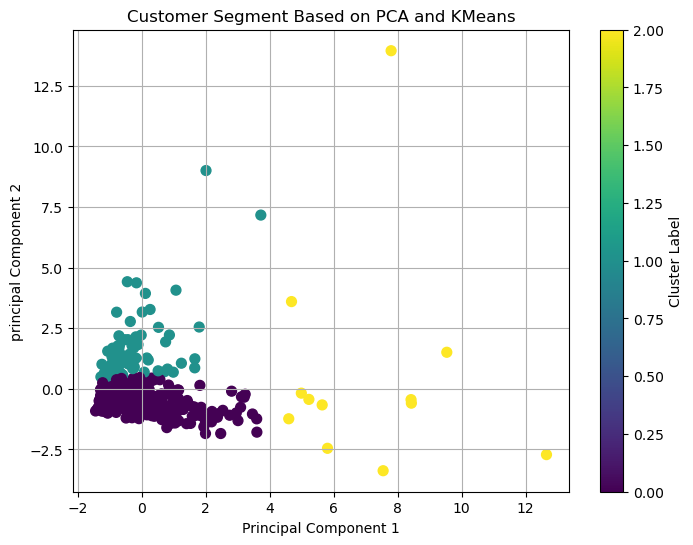

In [16]:
import matplotlib.pyplot as plt

# Plot the clustered data in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Customer Segment Based on PCA and KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [17]:
import pandas as pd
# Load the dataset again
data = pd.read_csv("Wholesale customers data.csv")

# Preview it
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
from sklearn.preprocessing import StandardScaler

# Remove the 'Channel' and 'Region' columns (if they exist)
X = data.drop(['Channel', 'Region'], axis=1)

# Scale the data
scalar = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [20]:
# Add cluster labels to the scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Cluster'] = labels

# Show the first few rows
X_scaled_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


In [22]:
# Group by cluster and get the average values for each feature
cluster_profiles = X_scaled_df.groupby('Cluster').mean()

# Display the results
cluster_profiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,-0.242604,-0.212661,-0.221572,-0.186569,-0.203234,-0.150077
1,1.784209,0.008694,-0.192645,1.396080,-0.398960,0.759479
2,-0.260860,1.999209,2.371905,-0.234950,2.493966,0.331741


Cluster Interpretations


Cluster 0 Summary
Spending Pattern: Below-average spending across all categories.

Possible Business Type: Likely small shops or low-budget customers.

Use Case: Could be targeted with low-cost product bundles or entry-level supply offers.


Cluster 1 Summary
Spending Pattern: Very high spending on Fresh, Frozen and Delicassen items.

Possible Business Type: Possibly restaurants, hotels or catering services that buy perishable and specialty foods.

Use Case: Offer bulk pricing or loyalty programs on fresh and gourmet goods.


Cluster 2 Summary
Spending Pattern: Very high on Milk, Grocery and Detergents_Paper.

Possible Business Type: Likely retailers, supermarkets or convenience stores.

Use Case: Target them with cleaning product deals, bulk grocery offers or delivery partnerships.

In [23]:
clusters = kmeans.labels_

In [24]:
# Combine the original scaled data with the cluster labels
final_df = X_scaled_df.copy()
final_df['Cluster'] = clusters

# Save the final DataFrame to a CSV file
final_df.to_csv('wholesale_customers_clustered.csv', index=False)

# Display confirmation
print("Clustered data saved to 'wholesale_customers_clustered.csv'")

Clustered data saved to 'wholesale_customers_clustered.csv'


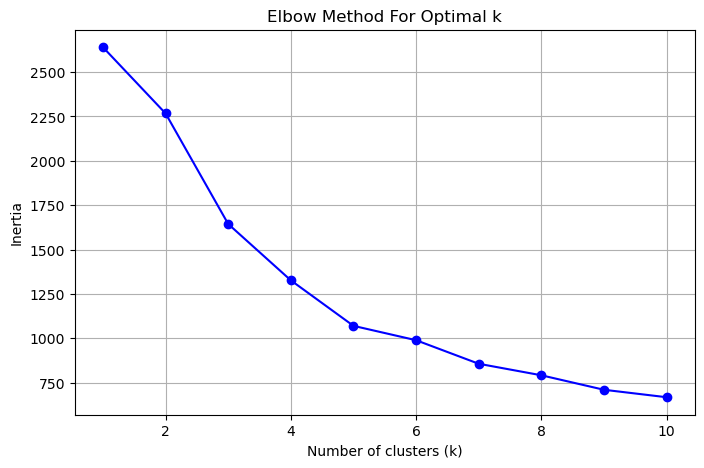

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [27]:
optimal_k = 5

In [28]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Region' column if it's there (safe even if it's already dropped)
if 'Region' in data.columns:
    data = data.drop('Region', axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scalar.fit_transform(data)

In [30]:
from sklearn.preprocessing import StandardScaler

# Assuming you already loaded the data into a variable called 'data'
# and dropped the 'Region' column if needed
if 'Region' in data.columns:
    data = data.drop('Region', axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Check if it worked
scaled_data[:5]

array([[ 1.44865163,  0.05293319,  0.52356777, -0.04111489, -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163, -0.39130197,  0.54445767,  0.17031835, -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163, -0.44702926,  0.40853771, -0.0281571 , -0.13753572,
         0.13323164,  2.24329255],
       [-0.69029709,  0.10011141, -0.62401993, -0.3929769 ,  0.6871443 ,
        -0.49858822,  0.09341105],
       [ 1.44865163,  0.84023948, -0.05239645, -0.07935618,  0.17385884,
        -0.23191782,  1.29934689]])

In [31]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Put the components into a DataFrame
import pandas as pd
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

# Show the first few rows
pca_df.head()

,PCA1,PCA2
0,0.829041,-0.543064
1,1.048167,-0.510652
2,1.253613,0.656304
3,-1.071759,0.585254
4,0.617812,0.946435


In [32]:
from sklearn.cluster import KMeans

# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_df)

# Add cluster labels to the PCA dataframe
pca_df['Cluster'] = kmeans.labels_

# Show the first few rows
pca_df.head()

,PCA1,PCA2,Cluster
0,0.829041,-0.543064,0
1,1.048167,-0.510652,0
2,1.253613,0.656304,0
3,-1.071759,0.585254,1
4,0.617812,0.946435,3


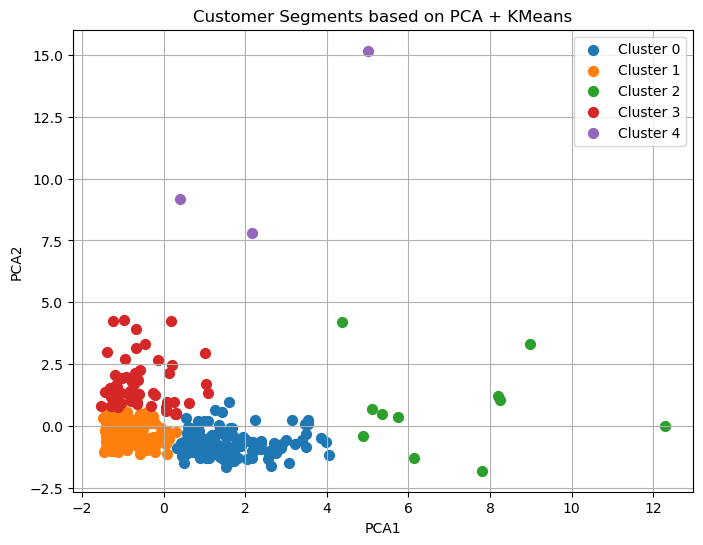

In [33]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))

# Use a diferent color for each cluster
for cluster in range(5):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}', s=50)

plt.title('Customer Segments based on PCA + KMeans')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering with k=5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Add the cluster labels to the DataFrampca_df['Cluster] = clusters

# View the updated DataFrame
pca_df.head()

,PCA1,PCA2,Cluster
0,0.829041,-0.543064,0
1,1.048167,-0.510652,0
2,1.253613,0.656304,0
3,-1.071759,0.585254,1
4,0.617812,0.946435,3


In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(principal_components)

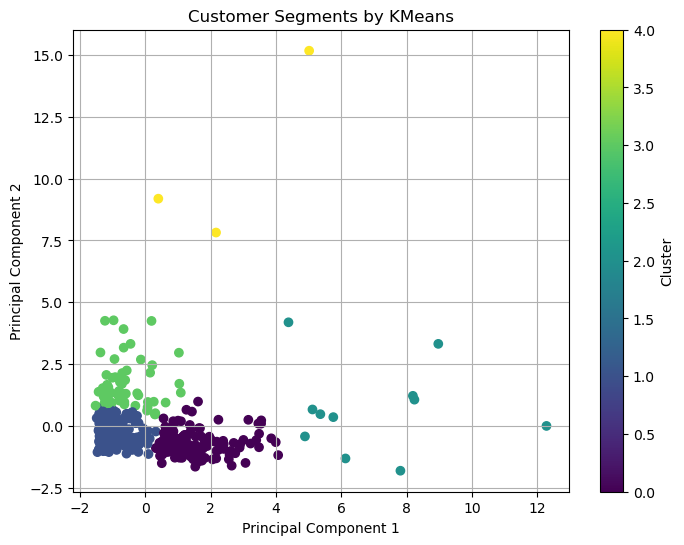

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments by KMeans')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [51]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Wholesale customers data.csv")

# Preview the data
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [52]:
# Add the cluster labels to the original dataset
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels

# Display the updated dataset
data_with_clusters.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3


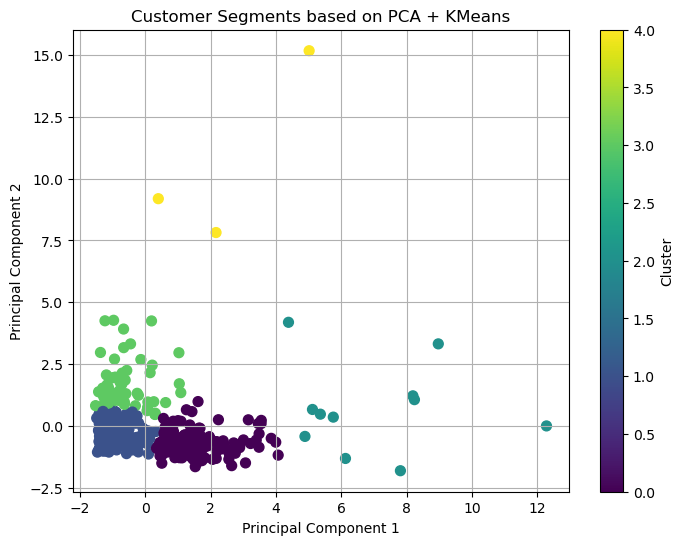

In [54]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA data
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', s=50)

# Add axis labels and a title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments based on PCA + KMeans')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [55]:
# Add the cluster labels to the original data
data['Cluster'] = cluster_labels

In [56]:
# Now group by cluster and analyze
cluster_analysis = data.groupby('Cluster').mean()
cluster_analysis

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.967742,2.629032,7177.725806,9136.080645,14553.830645,1294.814516,6365.064516,1524.161290
1,1.021097,2.481013,9336.738397,2539.367089,3304.641350,2144.902954,724.084388,893.949367
2,2.000000,2.545455,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636
3,1.092308,2.600000,27839.215385,5258.215385,5405.461538,8198.507692,729.738462,2492.738462
4,1.000000,2.666667,60571.666667,30120.333333,17314.666667,38049.333333,2153.000000,20700.666667


In [57]:
import matplotlib.pyplot as plt

In [58]:
print(principal_components[:5])
print(cluster_labels[:5])

[[ 0.82904097 -0.5430644 ]
 [ 1.04816682 -0.51065187]
 [ 1.25361312  0.65630439]
 [-1.0717588   0.58525366]
 [ 0.61781187  0.94643547]]
[0 0 0 1 3]


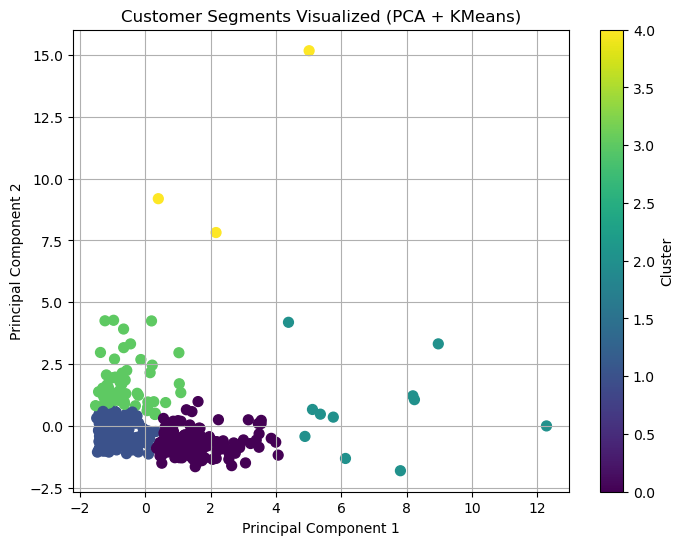

In [59]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    c=cluster_labels,
    cmap='viridis',
    s=50
)
plt.title('Customer Segments Visualized (PCA + KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [60]:
data_with_clusters = data.copy() # create a copy of the original data
data_with_clusters['cluster'] = cluster_labels # add the cluster labels

In [61]:
data_with_clusters.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,cluster
0,2,3,12669,9656,7561,214,2674,1338,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,0
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,3,3


In [62]:
cluster_summary = data_with_clusters.groupby('cluster').mean(numeric_only=True)
cluster_summary

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
cluster,,,,,,,,,
0,1.967742,2.629032,7177.725806,9136.080645,14553.830645,1294.814516,6365.064516,1524.161290,0.0
1,1.021097,2.481013,9336.738397,2539.367089,3304.641350,2144.902954,724.084388,893.949367,1.0
2,2.000000,2.545455,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636,2.0
3,1.092308,2.600000,27839.215385,5258.215385,5405.461538,8198.507692,729.738462,2492.738462,3.0
4,1.000000,2.666667,60571.666667,30120.333333,17314.666667,38049.333333,2153.000000,20700.666667,4.0


In [63]:
# Rename all five clusters withplaceholder labels
cluster_names = {
    0: 'Segment A',
    1: 'Segment B',
    2: 'Segment C',
    3: 'Segment D',
    4: 'Segment E',
}

data_with_clusters['Segment'] = data_with_clusters['cluster'].map(cluster_names)

In [64]:
# See average spending per feature in each Segment
data_with_clusters.groupby('Segment').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,cluster
Segment,,,,,,,,,,
Segment A,1.967742,2.629032,7177.725806,9136.080645,14553.830645,1294.814516,6365.064516,1524.161290,0.0,0.0
Segment B,1.021097,2.481013,9336.738397,2539.367089,3304.641350,2144.902954,724.084388,893.949367,1.0,1.0
Segment C,2.000000,2.545455,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636,2.0,2.0
Segment D,1.092308,2.600000,27839.215385,5258.215385,5405.461538,8198.507692,729.738462,2492.738462,3.0,3.0
Segment E,1.000000,2.666667,60571.666667,30120.333333,17314.666667,38049.333333,2153.000000,20700.666667,4.0,4.0


Customer Segments Summary


Segment A (Cluster 0):
These customers are primarily retailers or mixed-type clients. They spend heavily on Grocery and Milk, indicating that they likely operate small retail shops or convenience stores. Their low spending on Frozen products suggests they are not focused on frozen food storage or preparation.

Segment B (Cluster 1):
This group shows moderate and selective purchasing behavior. They have moderate spending on Fresh and Frozen, with moderate spending on Milk and Grocery. These customers are probably individuals or small food outlets with varied but controlled needs.

Segment C (Cluster 2):
Cluster 2 represents high-volume commercial customers who spend very highly on Milk, Grocery and Detergents_Paper. This pattern suggests they are large retailers or supermarkets with high operational supply needs.

Segment D (Cluster 3):
This segment spends significantly on Fresh and Frozen products. Their low spending on Detergents_Paper implies they are likely restaurants or fresh food markets, likely focused on serving fresh meals rather than retailing packaged goods.

Segment E (Cluster 4):
These are the highest spenders across almost all product categories. Their massive purchases of Fresh, Milk, and Frozen items indicate they are likely large-scale businesses, such as hotels, luxury restaurants or bulk caterers.



In [65]:
# Save the final clustered data to a CSV file
data_with_clusters.to_csv("wholesale_customers_clustered.csv", index=False)

print("Clustered data saved as'wholesale_customers_clustered.csv'")

Clustered data saved as'wholesale_customers_clustered.csv'


In [66]:
# Save the final dataset with cluster labels
data_with_clusters.to_csv('wholesale_customers_clustered.csv', index=False)